# Haberman Data Analysis

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading the File

In [2]:
haberman = pd.read_csv(r'C:\Users\Hp\haberman.csv')

### Data Understanding

In [3]:
#prints the 5 entries from file
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
#prints the range of index 
haberman.index

RangeIndex(start=0, stop=305, step=1)

In [5]:
#prints the column name of file
haberman.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [6]:
#prints the number of rows and number of columns
haberman.shape

(305, 4)

### Observation(s)
1.The dataset contains 305 rows and 4 columns

In [7]:
#prints information about dataset
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     305 non-null    int64
 1   year    305 non-null    int64
 2   nodes   305 non-null    int64
 3   status  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


### Observation(s)
1.No missing value in dataset

2.All column data types are integer

In [8]:
#checks if there are null values or missing values present in dataset
haberman.isna().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

### Observation(s)
1.There are no null values in data set

In [9]:
#describes the dataset
haberman.describe()

,age,year,nodes,status
count,305.000000,305.000000,305.000000,305.000000
mean,52.357377,62.868852,4.032787,1.262295
std,10.678010,3.242783,7.200528,0.440605
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.000000,66.000000,4.000000,2.000000
max,78.000000,69.000000,52.000000,2.000000


### Observation(s)
1.1.Sice the status is integer value we have to convert it to categorical value 

i.e 1 - survived(survived for more than 5 years) 

    2 - not survived(not survived for more than 5 years)

In [10]:
#replacing integer values of status column
haberman = haberman.replace({
    'status':{1:'survived',2:'not survived'}
})

In [11]:
#printing the new dataset which replaces the status columns
haberman.head(10)

,age,year,nodes,status
0,30,64,1,survived
1,30,62,3,survived
2,30,65,0,survived
3,31,59,2,survived
4,31,65,4,survived
5,33,58,10,survived
6,33,60,0,survived
7,34,59,0,not survived
8,34,66,9,not survived
9,34,58,30,survived


In [12]:
haberman.describe()

,age,year,nodes
count,305.000000,305.000000,305.000000
mean,52.357377,62.868852,4.032787
std,10.678010,3.242783,7.200528
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.000000,66.000000,4.000000
max,78.000000,69.000000,52.000000


In [13]:
#checking the data is balanced or imbalanced
haberman['status'].value_counts()

survived        225
not survived     80
Name: status, dtype: int64

### Observation(s)
1.The data is imbalanced.

2.Out of 305 patients 225 are survived and 80 are not survived.

# Univariate Analysis

In [14]:
#creating seperate dataframes for coulms status

survived_status = haberman[haberman['status'] == 'survived']

not_survived_status = haberman[haberman['status'] == 'not survived']

In [15]:
survived_status.describe()

,age,year,nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [16]:
not_survived_status.describe()

,age,year,nodes
count,80.000000,80.000000,80.000000
mean,53.312500,62.887500,7.525000
std,9.677841,3.318509,9.222942
min,34.000000,58.000000,0.000000
25%,46.000000,59.750000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.250000
max,78.000000,69.000000,52.000000


### Observation(s)
1.survived_status dataframe stores all the data where status is survived

2.not_survived_status dataframe stores all the data where status is not survived

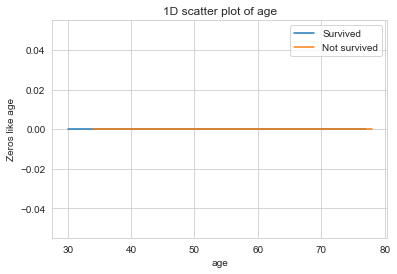

In [77]:
#plotting 1d scatter plot of age,year and nodes column separately

#1d scatter plot of age
plt.plot(survived_status['age'],np.zeros_like(survived_status['age']),label='Survived')
plt.plot(not_survived_status['age'],np.zeros_like(not_survived_status['age']),label='Not survived')
plt.title('1D scatter plot of age')
plt.xlabel('age')
plt.ylabel('Zeros like age')
plt.legend()

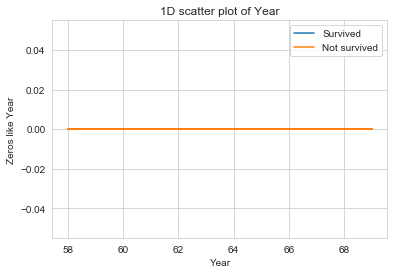

In [75]:
#1d scatter plot of year
plt.plot(survived_status['year'],np.zeros_like(survived_status['year']),label='Survived')
plt.plot(not_survived_status['year'],np.zeros_like(not_survived_status['year']),label='Not survived')
plt.title('1D scatter plot of Year')
plt.xlabel('Year')
plt.ylabel('Zeros like Year')
plt.legend()

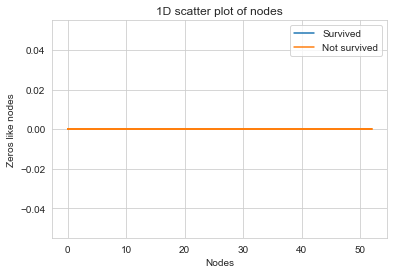

In [73]:
#1d scatter plot of nodes
plt.plot(survived_status['nodes'],np.zeros_like(survived_status['nodes']),label='Survived')
plt.plot(not_survived_status['nodes'],np.zeros_like(not_survived_status['nodes']),label='Not survived')
plt.title('1D scatter plot of nodes')
plt.xlabel('Nodes')
plt.ylabel('Zeros like nodes')
plt.legend()

### Observation(s)
1.Very hard to make sense as points overlap

2.Using histogram,probablity Density function(PDF) makes easy to analyze.

# Histogram and Probablity Density Function(PDF)

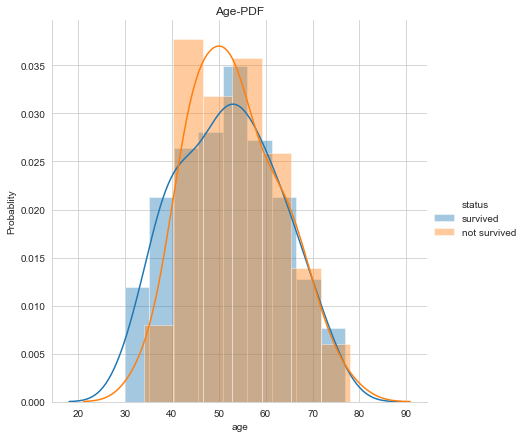

In [51]:
#Better way of visualizing 1d scatter plot

#PDF of age

sns.set_style('whitegrid')
sns.FacetGrid(haberman,hue='status',height=6) \
        .map(sns.distplot,'age') \
         .add_legend();
plt.title('Age-PDF')
plt.ylabel('Probablity')
plt.show()

### Observation(s)
1.From the above plot it is observed that the age from 30 to 75 have same survived and not survived status so we can not predict anything from this feauture.

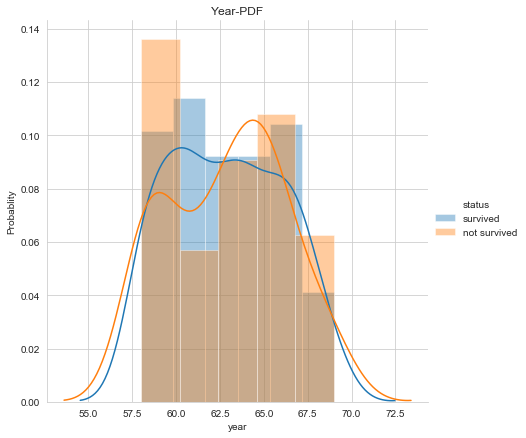

In [52]:
#PDF of year

sns.FacetGrid(haberman,hue='status',height=6) \
    .map(sns.distplot,'year') \
    .add_legend();
plt.title('Year-PDF')
plt.ylabel('Probablity')
plt.show()

### Observation(s)
1.same here we can not predict anything from this feature since points overlap.

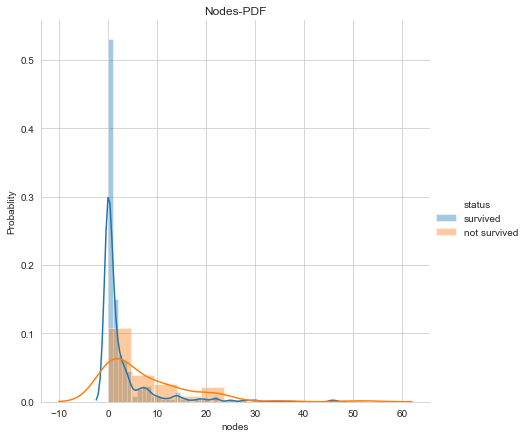

In [53]:
#PDF of nodes

sns.FacetGrid(haberman,hue='status',height=6) \
    .map(sns.distplot,'nodes') \
    .add_legend();
plt.title('Nodes-PDF')
plt.ylabel('Probablity')
plt.show()


### Observation(s)
1.From the above plot it is observed that if there are less nodes then chances of survival is more and if there are more nodes then chances of not surviving is more.

2.But still it is hard to identify as points overlap.

3.Compared to other two feature number of nodes is best feature to choose to build model.

if(nodes>=0 && nodes<=3) 
     
        print 'patient survived for 5 years or longer' 
elif(nodes>3) 
     
         print 'patient died within 5 year'

# Cumulative Distribution Function(CDF)

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]
[0.5625 0.15   0.1375 0.05   0.075  0.     0.0125 0.     0.     0.0125]
[0.5625 0.7125 0.85   0.9    0.975  0.975  0.9875 0.9875 0.9875 1.    ]


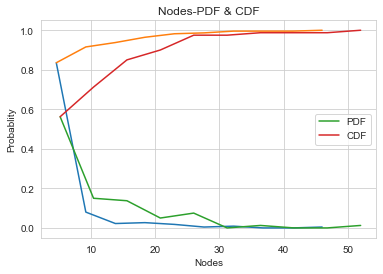

In [58]:
#From PDF we can only get to know the survival status but not the percentage of patient survived and not survived. 
#we can get it by plotting CDF
#from the PDF drawn above nodes is best feature to choose among all feature so we will plot cdf of nodes.

counts,bin_edges = np.histogram(survived_status['nodes'],bins=10,density=True)
pdf=counts/sum(counts)
print(pdf)

#computing cdf
cdf = np.cumsum(pdf)
print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts,bin_edges = np.histogram(not_survived_status['nodes'],bins=10,density=True)
pdf = counts / sum(counts)
print(pdf)

#computing cdf
cdf = np.cumsum(pdf)
print(cdf)



plt.plot(bin_edges[1:],pdf,label = 'PDF')
plt.plot(bin_edges[1:],cdf,label = 'CDF')

plt.title('Nodes-PDF & CDF')
plt.xlabel('Nodes')
plt.ylabel('Probablity')
plt.legend()

### Observation(s)
1.from the combined graph above we can observe that cdf of survived_status shows that nearly 82 percent of people have chances of surviving 5 or more years as their nodes lies in range of 0 to 4.

2.Nearly 58 percent of people who are not survived have nodes in range of 0 to 3.
 

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]
[0.0375 0.075  0.2125 0.1125 0.2    0.1    0.0875 0.1125 0.0375 0.025 ]
[0.0375 0.1125 0.325  0.4375 0.6375 0.7375 0.825  0.9375 0.975  1.    ]


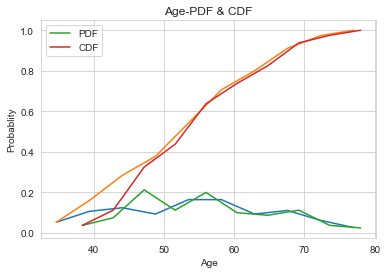

In [59]:
#cdf of age
counts,bin_edges = np.histogram(survived_status['age'],bins=10,density=True)
pdf=counts/sum(counts)
print(pdf)

#computing cdf
cdf = np.cumsum(pdf)
print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts,bin_edges = np.histogram(not_survived_status['age'],bins=10,density=True)
pdf = counts / sum(counts)
print(pdf)

#computing cdf
cdf = np.cumsum(pdf)
print(cdf)

plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:],cdf,label='CDF')

plt.title('Age-PDF & CDF')
plt.xlabel('Age')
plt.ylabel('Probablity')
plt.legend()

### Observation(s)
1.Nearly 10 to 15 percent of people who are survived have age less than or equal to 30.

2.age greater than 40 have less survival.

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[0.18666667 0.29333333 0.39555556 0.46666667 0.56444444 0.66666667
 0.73333333 0.83111111 0.92444444 1.        ]
[0.25   0.05   0.0375 0.0875 0.1    0.1    0.1625 0.075  0.05   0.0875]
[0.25   0.3    0.3375 0.425  0.525  0.625  0.7875 0.8625 0.9125 1.    ]


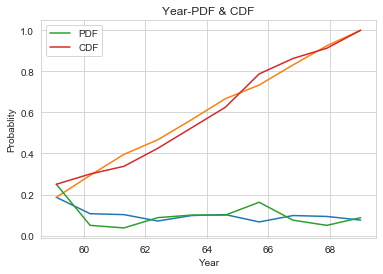

In [60]:
#cdf of year
counts,bin_edges = np.histogram(survived_status['year'],bins=10,density=True)
pdf=counts/sum(counts)
print(pdf)

#computing cdf
cdf = np.cumsum(pdf)
print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts,bin_edges = np.histogram(not_survived_status['year'],bins=10,density=True)
pdf = counts / sum(counts)
print(pdf)

#computing cdf
cdf = np.cumsum(pdf)
print(cdf)

plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:],cdf,label='CDF')

plt.title('Year-PDF & CDF')
plt.xlabel('Year')
plt.ylabel('Probablity')
plt.legend()

### Mean,Variance and Standard deviation

In [26]:
print("Means")
print(np.mean(survived_status['nodes']))

#Appending an outlier
print(np.mean(np.append(survived_status['nodes'],60)))

print(np.mean(not_survived_status['nodes']))

print("\nStandard Deviations")
print(np.std(survived_status['nodes']))
print(np.std(not_survived_status['nodes']))

Means
2.7911111111111113
3.0442477876106193
7.525

Standard Deviations
5.857258449412131
9.165117293302908


### Observation
1.After adding an outlier there is no much difference in means of survival status.

2.The non_survival status is 7.52 which is much more than survival status so the average nodes for non survival status is more compared to survival status.

3.The standard deviation of survival status is 5.85 and non survival status is 9.16 so the spread of data is more in non survival status.

### Median

In [27]:
print("Medians")
print(np.median(survived_status['nodes']))

#appending an outlier
print(np.median(np.append(survived_status['nodes'],51)))
print(np.median(not_survived_status['nodes']))

Medians
0.0
0.0
4.0


### Observation(s)
1.Afeter adding an outlier the median remains same.When more than 50 percent of data points are corrupted then median will get corrupt.

2.The median for survival status is 0 and median for non survival status is 4. so people with average 4 nodes have non_survival status

### Percentile and Quantile

In [28]:
print("Quantiles")
print(np.percentile(survived_status['nodes'],np.arange(0,100,25)))
print(np.percentile(not_survived_status['nodes'],np.arange(0,100,25)))

print("\n90th percentile")
print(np.percentile(survived_status['nodes'],90))
print(np.percentile(not_survived_status['nodes'],90))

Quantiles
[0. 0. 0. 3.]
[ 0.    1.    4.   11.25]

90th percentile
8.0
20.10000000000001


### Observation(s)
1.From Quantiles it is observed that 50 percent of people have 0 nodes in survival_status and 75 percent people have nodes less tahn 3 and 25 percent people have nodes greater than 3.

2.In not_survival_status 50 percent of people have 4 nodes and 75 percent people have 11 nodes.

3.90 percent value detected are 8 then it has survival_status and if 90 percent values detected are 20 then it is not_survival status.

### Box-Plots

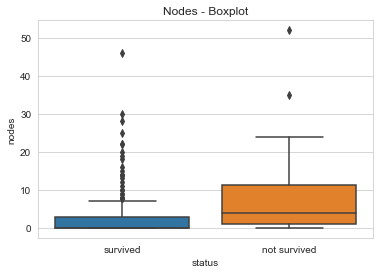

In [61]:
#from the plots of histogram and pdf we can not get any percentile values but from cdf we can get percentile values
#Box plots are easier way to understand the percentile values.

sns.boxplot(x='status',y='nodes',data=haberman)
plt.title('Nodes - Boxplot')
plt.show()

### Observation(s)
1.Survived box plot shows the range of nodes is 0 to 8 and 25th and 50th percentile are nearly same and 75th percent value is nearly 2.

2.Not survived box plot shows the range of nodes is 0 to 11 and 25th percentile value is nearly 1,50th percentile value of not survived and 75th percentile value of survived are nearly same.

3.since 50th percentile of not survived and 75th percentile are nearly same there is an error of 50 percent i.e nodes in range of 0 to 8 have chances of predicting status as not survived as their plot lies in it.

### Violin Plots

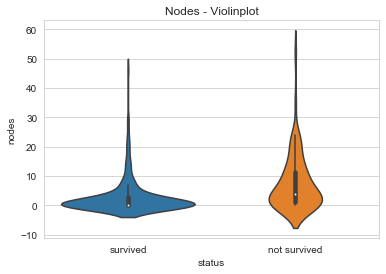

In [62]:
#voilin plots combines pdf,histogram and box plots in one plot

sns.violinplot(x='status',y='nodes',data=haberman)
plt.title('Nodes - Violinplot')
plt.show()

### Observation(s)
1.Violin plot of survived shows that nodes lie in range of nearly 0 to 8 and spread or density is more in range of 0 to 1.

2.Violin plot of not survived shows that nodes lie in range of nearly 0 to 11 and density is more in range of 0 to 10.

# Bivariate Analysis

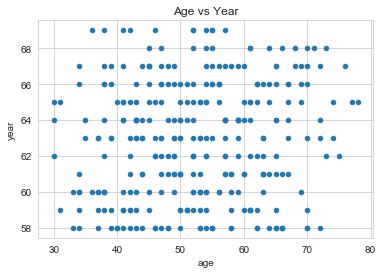

In [65]:
#2d scatter plot of age and year

haberman.plot(kind='scatter',x='age',y='year')
plt.title("Age vs Year")
plt.show()

### Observation(s)
1.Above scatter plot shows that data is overlapped and all data points are in same color we can not observe anything.so we use seaborn package to better visualise.

2.Only observation we can make is tha age values in range of 30 to 80 and year in range of 58 to 68.

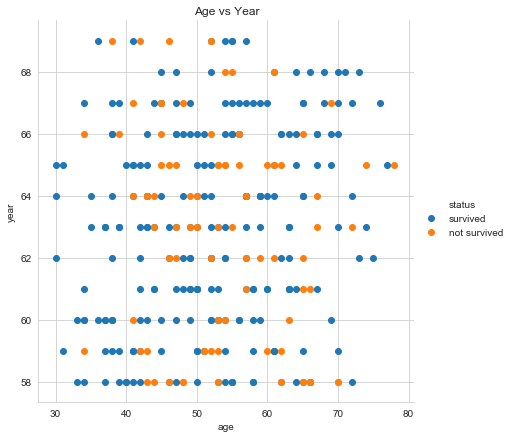

In [66]:
#using status column to colot data points.

sns.set_style('whitegrid')
sns.FacetGrid(haberman,hue='status',height=6) \
   .map(plt.scatter,'age','year') \
   .add_legend();
plt.title('Age vs Year')
plt.show()

### Observation(s)
1.It is very hard to make analyze as most of data points are overlapping.

2.one conclusion we can make is 

     if(age>30 and age<40)
          print 'survived for 5 years or longer'
          
     elif(age>40)
           print 'Died within 5 years'.

3.the above conclusion is not perfect as most of points overlap.


# Pair Plots

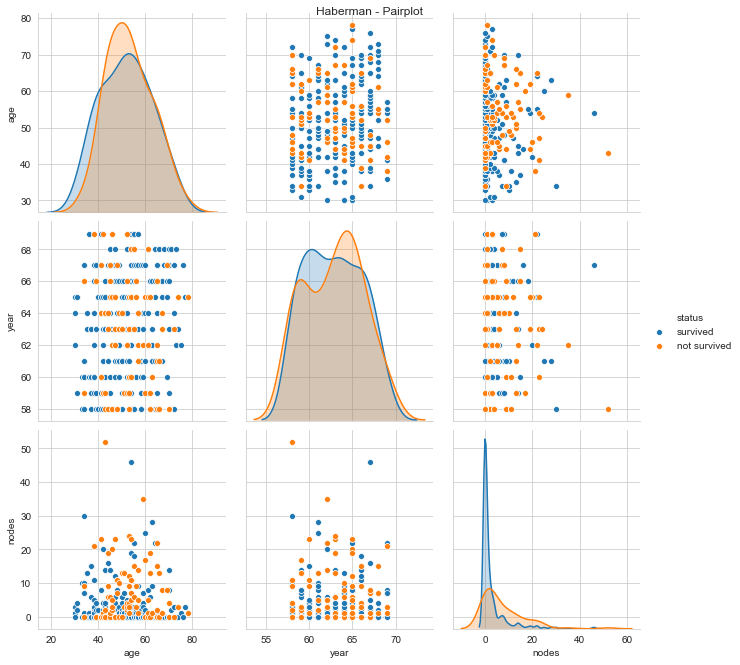

In [71]:
#there are 3 features in data set and possible plots of all features can be plotted using pair plots.

plt.close()
sns.pairplot(haberman,hue='status',diag_kind='kde',height=3)
plt.suptitle("Haberman - Pairplot", y=1.005)
plt.show()

### Observation(s)
1.As most of the data points in all plots are overlapping we can not make better conclusion.

2.For plot 4 we had made the observation in above plot so age is the feature we can select.

3.Some data points in plot 3 are distinguishable but it is not perfect so nodes is the feature to choose.

# Multivariate Probablity Density and Contour plots

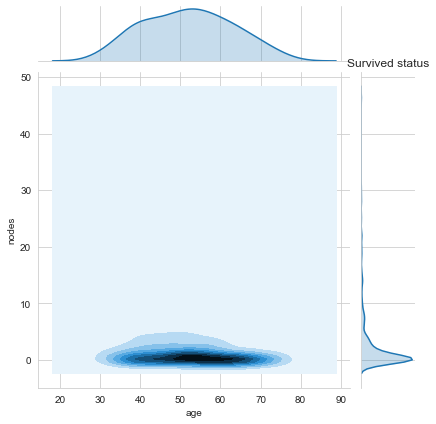

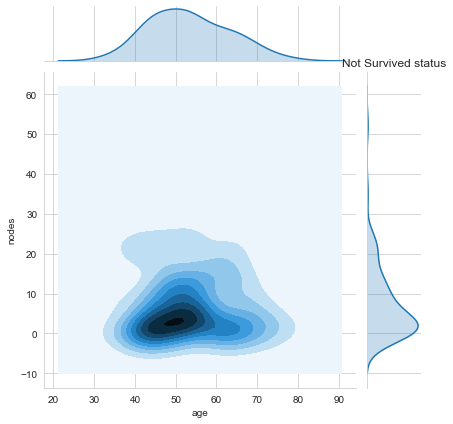

In [78]:
#from the above pairplot we observed that age and nodes are the best feature to choose.
#2d density plot for survived_status or people survived 5 or more year
sns.jointplot(x='age',y='nodes',data=survived_status,kind='kde')
plt.title('Survived status')

sns.jointplot(x='age',y='nodes',data=not_survived_status,kind='kde')
plt.title('Not Survived status')
plt.show()

### Observation(s)
1.The dark area in plot have more density of data points.

2.the density of data points for age is more in range of 40 to 65 and for nodes nearly 0 to 2.

### Conclusions
1.From the PDF plot we have seen that surviving 5 or more year chances are more if we have less nodes and as nodes increases survival chances decreases.

2.People with 0 nodes have more chances of surviving 5 or more years.

3.Few people with high number of nodes survived and few people with small number of nodes also died.so nodes alone can not make better predictions as we discussed in pdf of nodes.
